In [ ]:
from typing import Dict, List, Any
from pathlib import Path
import torch.nn as nn
import torch
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence

![photo_2023-02-14_22-11-58.jpg](![photo_2023-02-14_22-12-03.jpg](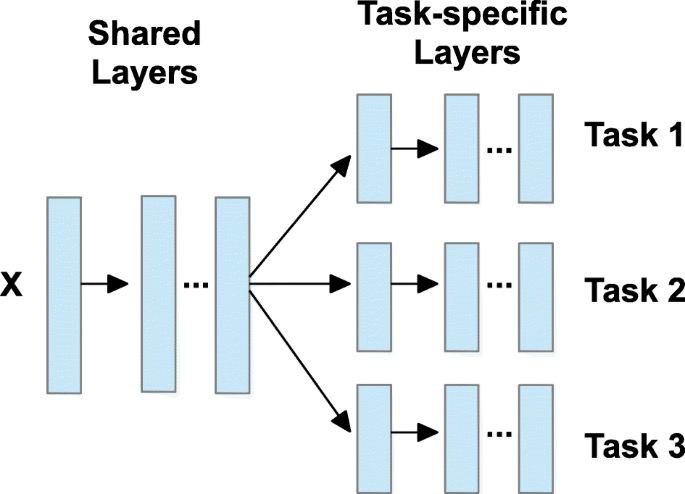![photo_2023-02-14_22-11-58.jpg](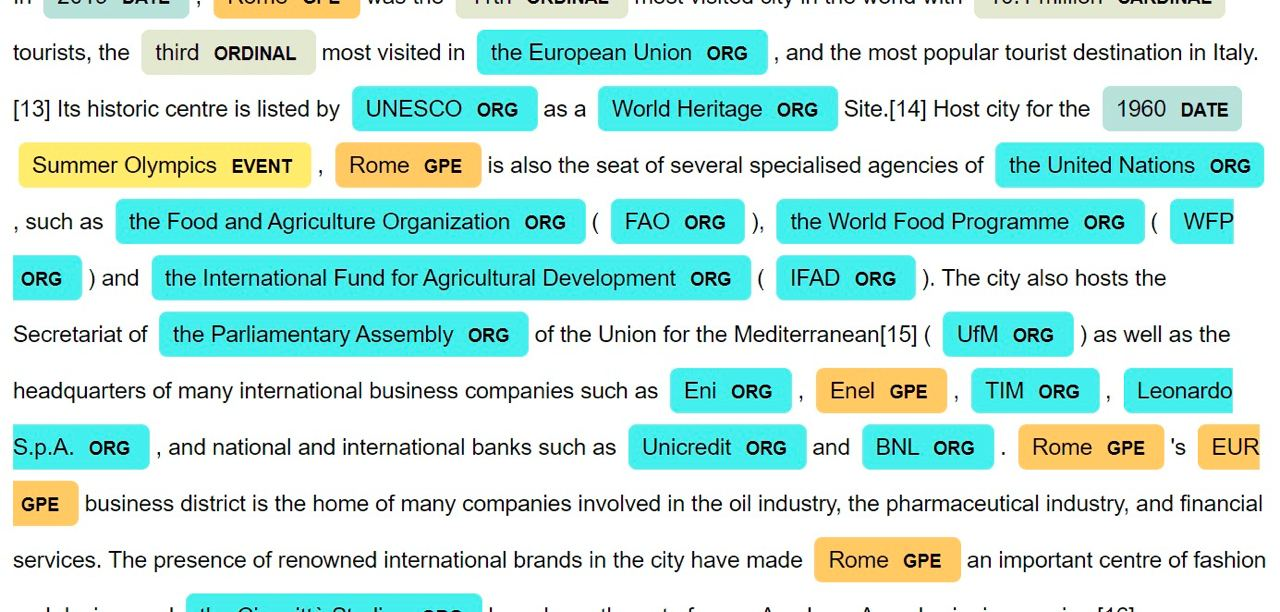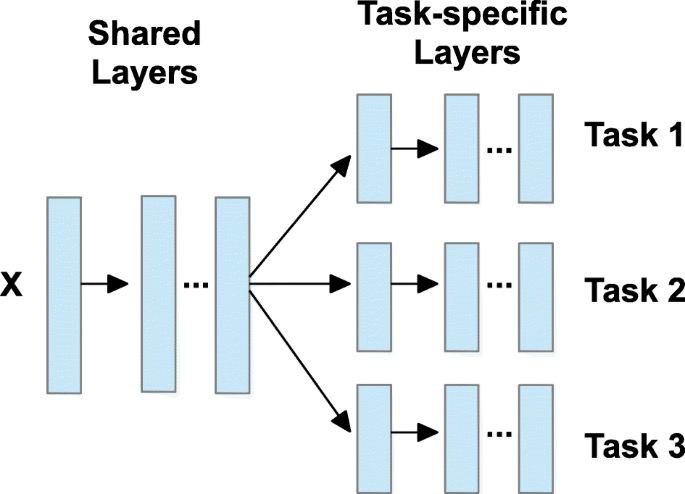))+OAKOk4RjWmCpxKDtBW911gQkn6zJFAzzCZThYIW/SWTQgoo7rrKu2MrYsFNotUxCMM27dAetwAQUCjMJjQphf4bFKNcBKOu2YtyBDJaAbs455q5bgmmNdr/AAVMCrFJLqbP7IxSZKtIBtZdPFggIS6dEQTLWwtDQrWXmlh63VRdfvHCzIFpte0P5EG5nR2LyTiVlLQUsat4nIqmbK2LgfZuzIMw62lUzC36oJaDIbms1BE2QcWioouuJlgTQlimTtEgzaFAdLKcHMqUFKXNQIZqjx5wIq9kBZUej2jCWsiypi+sOnM8vIKUidIzKt5YIGXC0OIKuqpSYS223CBGvUaQtnH9FZhEFXsFhzOXnlldS0SYNvETlzLGWBTmyrvEJtZc0DT0uqlGX7gqKRuPfkr8QohsUCAyZpq+YYkOMAtVVBWdxQ1nREewp1uIiAUSkg4yE0DQ3yhFeFr5WGZHLC2SUFctrSU4bU3OtT4T3os6aVixmSBSsiPy8AvbteXeYAeAj1MUsbGv9wLxF42K80wFmZUcUzZca3FdBYJSY+L4eU5lSuvhua8az/DU48L9RuQJzHpVTf8AI8ePCv8ADX/h3/468OIeD40Gw4F6rY2pw2EquPCv58/zv+D+zwtGxqLnrctcLFYLZmq4JaxbzLJVviIaFJb19ZavWAYFPWJ2VJvw+Y6Tjwr+FKuVbpcLk06O6bya318HP8ePDnxPHiGpXjzOP8Nf5aP8FHjX8q/99f8AytZgqMO2Kn3BPsCfYE+wJ9gT7An3BPsCfYE+wJ9gT7An2BPsCfYEz/7CFO825hoKBR//AF6pdOhnodp9jPs59nPs59nPs59nPs59nPs59jPs59nPsZ9nPs59jPs59nPsZ9nPs59nPs59nPsZ9nPs59jPs59nPsZ9nPs59jBabelcxLgydH/9SEjlOgNquiENgEAdImzwE/wgturNl9/FbHBwBtV0QJHidg6RNn+ELICFZpdg7+CvDyf0T1hIMlqqA6rDQcsvB1Ewz1nrPWa0ekPJaXEhbYwDa71XeFwC6IOom4N8z1nrPWbdlU0NjWntC1ouyWNcRF6C9uNSmUrRPrAdJuUpues9YZfbGB1VwQYrVoL6wvJ3J6z1nrPWU9Y4LXEpq7nrHCC5ZrmV3llKmp33/SOxMC2wspss6/yuOdmIrsGns/zshJuIDamnJjf8rII8+Fwev2SDqWt/wkZKyAdVcEJ3wOA6RNn8LjY3gyG0nJ0/lcpq9XN2qMnr/JAVaDll2DKG1bpMeNx0IAWollDJZ18VAt1LIWUbVhpMf4QwtaKA6rCHpSAdRMP8KEaZ0MFJtuHcOxAd11BEsn7/ADLODZLF3Y0N2Gyv/TE+F6Y8sIJ87Q14ZsVmoqSzJh4mcyhrQoLcuD/DsfO0J+6f0R4SsQOs0Ch0IQSvrQ8NEYVZYqxLv7SFsC6OgTFiQq7ObBt8pnssC0FBbmDZb4jSM2Ih0SHa4s41DuPOBW5ZzTDVrlx5ImROpLxKAWq47u5mIRlKMFmrGARUTMWNcuTncsPLaIHgerr6zbwz+FqXtLJMBSrp1/A3A4hY8cTXQxVo5eflUv2AwoQADyHeFtzstyIG4mgmOFigyM28RpEAzmUrQrHSGFJynzHWAt/l3BAaf5veOOhsyo4uEK/4/wAxoTSNH0l2MbCNyu4ZCcQhe2QQEZDLg6/4cm33MivIojS2A7FgfIx6fwdofX/lXTDu175oFDpgr+XwnSCvHBjhrDa2oWijpXiRFpKiU12Ktqspdr/hvxTaqxKckfuG9UNFqr6/wCn2Jckae5K6sZpN9bsWaKzV3UXBnVJbXCmL7w7EOUTmk9Re4GYyS2dNsP8Axf/Z)

In [ ]:
class Vocab:
    def __init__(self, token2idx: Dict[str, int], idx2token: List[str]):
        self.token2idx = token2idx
        self.idx2token = idx2token

    @staticmethod
    def from_data(data: List[str], pad: str = "[PAD]", unk: str = "[UNK]") -> 'Vocab':
        """ Get vocab from tokenized by spaces data """
        tok2idx = {pad: 0, unk: 1}
        idx2tok = [pad, unk]
        ...
        return Vocab(tok2idx, idx2tok)

    @property
    def pad(self):
        return self.idx2token[0]

    @property
    def pad_idx(self):
        return 0

    @property
    def unk(self):
        return self.idx2token[1]

    @property
    def unk_idx(self):
        return 1

    def __len__(self):
        ...

    def encode(self, sequence: List[str]) -> List[int]:
        return ...

In [ ]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TaggedSentence:
    tokens: List[str]
    poses: List[str]
    ner: List[str]

    def __post_init__(self):
        assert len(self.tokens) == len(self.poses) == len(self.ner)

class TextPreprocessor:

    @staticmethod
    def preprocess(path: Path) -> List[TaggedSentence]:
        data: List[TaggedSentence] = []
        with open(path) as f:
            lines = f.readlines()
            sentence: List[str] = []
            for line in lines:
                # YOUR CODE HERE
                # здесь следует обратить внимание на перевод строки: здесь заканчивается текущее предложение :)
                pass
        return data


In [ ]:
data = TextPreprocessor.preprocess("eng.train")
valid_data = TextPreprocessor.preprocess("eng.testa")

In [ ]:
data[:2]

In [ ]:
token_vocab = Vocab.from_data([" ".join([t for t in d.tokens]) for d in data])
pos_vocab = Vocab.from_data([" ".join([t for t in d.poses]) for d in data])
ner_vocab = Vocab.from_data([" ".join([t for t in d.ner]) for d in data])

In [ ]:
from torch.utils.data import Dataset
import torch
class CustomTagDataset(Dataset):
    def __init__(self, data: List[TaggedSentence], tok_vocab: Vocab, ner_vocab: Vocab, pos_vocab: Vocab):
        self._data = data
        self._tok = tok_vocab
        self._ner = ner_vocab
        self._pos = pos_vocab

    def __getitem__(self, idx: int):
        # YOUR CODE HERE
        return {"sent": enc_sent,
                "pos": enc_pos,
                "ner": enc_ner,
               }

    def __len__(self):
        return len(self._data)

In [ ]:
from torch.nn.utils.rnn import pad_sequence
def collate_fn_padd(batch):
    return {
        "sent": pad_sequence([s["sent"] for s in batch], padding_value=0, batch_first=True),
        "pos": pad_sequence([s["pos"] for s in batch], padding_value=0, batch_first=True),
        "ner": pad_sequence([s["ner"] for s in batch], padding_value=0, batch_first=True),
    }

In [ ]:
from torch import Tensor
class NERTagger(nn.Module):
    def __init__(self, token_vocab: Vocab,
                 ner_vocab: Vocab,
                 emb_dim: int, hidden_dim: int):
        super(NERTagger, self).__init__()
        self.emb = ...
        self.lstm = ... # add BiLSTM layer
        self.lin = ...

        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(0.2)

    def forward(self, batch: Tensor) -> Tensor:
        # TODO
        return self.lin(feats)

In [ ]:
from torch.utils.data import DataLoader
data_train = DataLoader(CustomTagDataset(data, token_vocab, ner_vocab, pos_vocab), batch_size=16, shuffle=True, collate_fn=collate_fn_padd)
data_valid = DataLoader(CustomTagDataset(valid_data, token_vocab, ner_vocab, pos_vocab), batch_size=16, shuffle=False, collate_fn=collate_fn_padd)

In [ ]:
import tqdm

BATCH_SIZE = 16
EPOCHS = 5
DEVICE = torch.device('cpu')

In [ ]:
from sklearn.metrics import classification_report
@torch.no_grad()
def print_metrics(model, data, batch_size=BATCH_SIZE, name="", **kw):
    model.eval()
    all_ = 0
    correct = 0
    for batch in data:
        # YOUR CODE HERE
    print(correct / all_)

In [ ]:
def train(model: nn.Module,
          train_data: List[Any],
          val_data: List[Any] = None,
          epochs: int = 5,
          batch_size: int = 16):

    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss(reduction='mean', ignore_index=0)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    if val_data is not None:
        print_metrics(model, val_data, max_len=128)

    for epoch in range(EPOCHS):
        print(f"epoch: {epoch}")
        model.train()
        for i, batch in tqdm.notebook.tqdm(enumerate(train_data)):
            pred = model(batch['sent'])
            loss = criterion(pred.permute(0,2,1), batch["ner"])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print_metrics(model, val_data, max_len=128)

In [ ]:
model = NERTagger(token_vocab, ner_vocab, emb_dim=100, hidden_dim=128)
train(model, data_train, val_data=data_valid)

In [ ]:
test_data = TextPreprocessor.preprocess("eng.testb")

In [ ]:
test_data[0]

In [ ]:
data_test = DataLoader(CustomTagDataset(test_data, token_vocab, ner_vocab, pos_vocab), batch_size=16, shuffle=False, collate_fn=collate_fn_padd)

In [ ]:
print_metrics(model, data_test, max_len=128)

Добавим в нашу модель CRF-слой и сравним результаты

In [ ]:
! pip install TorchCRF

In [ ]:
from TorchCRF import CRF

In [ ]:
class NerCRFTagger(nn.Module):
    def __init__(self, token_vocab: Vocab, 
                 ner_vocab: Vocab, 
                 emb_dim: int, hidden_dim: int):
        super(NERTagger, self).__init__()
        self.emb = ...
        self.lstm = ... # add BiLSTM layer
        self.lin = ...
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(0.2)
        
        self.crf = CRF(len(ner_vocab))
    
    def forward(self, batch: Tensor) -> Tensor:
        ...
        out = self.lin(feats)
        return self.crf.viterbi_decode(out)

Немного перепишем обучение

In [ ]:
<...>

А теперь поробуем написать такую модель, которая позволяет нам предсказывать несколько классов для одного слова.

In [ ]:
from torch import Tensor
class MultiTaskTagger(nn.Module):
    def __init__(self, token_vocab: Vocab, tag_vocab: Vocab, emb_dim: int, hidden_dim: int):
        super(MultiTaskTagger, self).__init__()
        # TODO

    def forward(self, batch: Tensor) -> Tuple[Tensor, ...]:
        # TODO